In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset California Housing

In [3]:
df_housing = pd.read_csv("/content/drive/MyDrive/Semana4-KNNySVM/data/housing.csv")

In [4]:
df_housing.shape

(20640, 10)

In [5]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Separar los datos en entrenamiento y prueba

El código siguiente utiliza la función pd.cut() para crear un atributo `income_cat` con cinco categorías (etiquetadas de 1 a 5): la categoría 1 va de 0 a 1,5 (es decir, menos de 15.000 $), la categoría 2 de 1,5 a 3, etc.

In [6]:
df_housing["income_cat"] = pd.cut(df_housing["median_income"], 
                                bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                                labels=[1, 2, 3, 4, 5])
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


Text(0.5, 0, 'Income category')

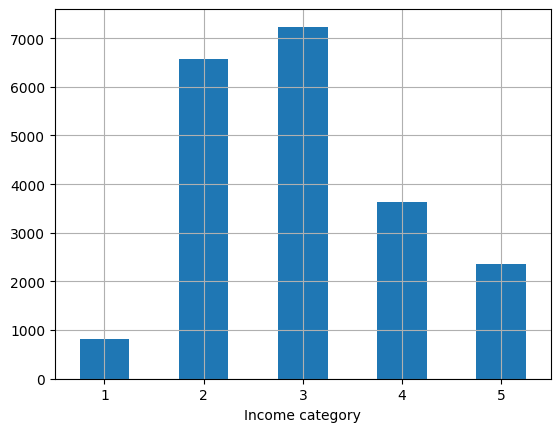

In [7]:
df_housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")

Ahora que tenemos la columna `income_cat` en categorías, podemos dividir los datos de manera estratificada.

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_housing, test_size=0.2, random_state=42, shuffle=True, stratify=df_housing['income_cat'])
print(train_set.shape)
print(test_set.shape)

(16512, 11)
(4128, 11)


In [9]:
for set_ in (train_set, test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [10]:
housing = train_set.copy()

In [11]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## Preparar los datos para usar con nuestros algoritmos de ML

### Datos de entrenamiento

In [12]:
housing_train = housing.drop("median_house_value", axis=1)
target_train = housing["median_house_value"].copy()

In [13]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


### Datos de prueba

In [14]:
housing_test = test_set.drop("median_house_value", axis=1)
target_test = test_set["median_house_value"].copy()

In [15]:
housing_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 3965
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4079 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   ocean_proximity     4128 non-null   object 
dtypes: float64(8), object(1)
memory usage: 322.5+ KB


### Datos faltantes, Atributos categóricos, Normalización de los datos


### Hacemos el análisis con los datos de entrenamiento

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [17]:
housing_num = housing_train.drop("ocean_proximity", axis=1)

**Pipeline numérico**

In [18]:
from sklearn.pipeline import Pipeline

pipeline_num = Pipeline(
    [
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ]
)

**Pipeline completo**

In [19]:
from sklearn.compose import ColumnTransformer

atributos_num = list(housing_num)
atributos_cat = ["ocean_proximity"]

pipeline_full = ColumnTransformer(
    [
        ("num", pipeline_num, atributos_num),
        ("cat", OneHotEncoder(), atributos_cat)
    ]
)

In [20]:
housing_train_final = pipeline_full.fit_transform(housing_train)

In [21]:
df_train_final = pd.DataFrame(housing_train_final, columns=atributos_num + ( ['op'+ str(i) for i in range(5)] )  ) 
df_train_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,op0,op1,op2,op3,op4
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,1.0,0.0,0.0,0.0,0.0
16508,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,0.0,1.0,0.0,0.0,0.0
16509,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,1.0,0.0,0.0,0.0,0.0
16510,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,1.0,0.0,0.0,0.0,0.0


In [22]:
housing_test_final = pipeline_full.transform(housing_test)
df_test_final = pd.DataFrame(housing_test_final, columns=atributos_num + ( ['op'+ str(i) for i in range(5)] )  ) 
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4128 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   op0                 4128 non-null   float64
 9   op1                 4128 non-null   float64
 10  op2                 4128 non-null   float64
 11  op3                 4128 non-null   float64
 12  op4                 4128 non-null   float64
dtypes: float64(13)
memory usage: 419.4 KB


In [23]:
array_train_final_ = np.hstack( ( (df_train_final.to_numpy()), (target_train.to_numpy())[:, np.newaxis] )  )

In [24]:
df_ = pd.DataFrame(array_train_final_, columns=atributos_num + ( ['op'+ str(i) for i in range(5)] ) + ["target"]  ) 
df_.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,op0,op1,op2,op3,op4,target
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076335,0.108071,0.063146,-0.019615,0.318160,-0.054733,0.006436,-0.475898,0.052194,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072213,-0.115290,-0.077765,-0.075146,-0.444080,0.350742,-0.011606,0.358881,-0.167113,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.323835,-0.298737,-0.306473,-0.111315,0.048905,-0.243223,0.010369,0.258548,0.022243,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.926340,0.855103,0.918396,0.200133,0.001089,0.023986,-0.005585,-0.027584,-0.008845,0.135140
total_bedrooms,0.076335,-0.072213,-0.323835,0.926340,1.000000,0.871863,0.974529,-0.009415,0.024435,-0.009137,-0.003522,-0.026168,0.001234,0.047735
population,0.108071,-0.115290,-0.298737,0.855103,0.871863,1.000000,0.904639,0.002421,0.077911,-0.022377,-0.006498,-0.065896,-0.022142,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.974529,0.904639,1.000000,0.010869,0.048127,-0.042293,-0.005713,-0.016036,0.002781,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009415,0.002421,0.010869,1.000000,0.167555,-0.233741,-0.006686,0.054898,0.025384,0.687151
op0,0.318160,-0.444080,0.048905,0.001089,0.024435,0.077911,0.048127,0.167555,1.000000,-0.607095,-0.009770,-0.315029,-0.341063,0.259521
op1,-0.054733,0.350742,-0.243223,0.023986,-0.009137,-0.022377,-0.042293,-0.233741,-0.607095,1.000000,-0.007527,-0.242712,-0.262770,-0.482853


## Regresión Lineal

Utilice el conjunto de datos California Housing para entrenar 3 modelos de regresión lineal:
- Univariada: usando un atributo (por ejemplo el más correlacionado). Grafique la recta de regresión obtenida.
- Bivariada: seleccione 2 atributos
- Multivariada: todos los atributos 

El **Error Cuadrático Medio (MSE)** es una medida cuantitativa útil para comparar diferentes modelos de regresión. 

$$MSE = \frac{1}{N}\sum_{i=1}^{n}(y^{(i)} - \hat y^{(i)})^2$$


- Comparar la raiz cuadrada del MSE obtenido en los 3 casos con los datos de entrenamiento y prueba, usar la función **mean_squared_error**.

En algunos casos, es más útil reportar el coeficiente de determinación $(R^2)$, el cual puede ser entendido como una versión estandarizada del MSE.

$$R^2 = 1- \frac{SSE}{SST}$$


SSE es la suma de los errores cuadráticos y SST la suma total de los cuadrados. $SST = \sum_{i=1}^{n}(y^{(i)} - \mu_y)^2$

Para el dataset de entrenamiento, $R^2$ está limitado entre 0 y 1, pero puede volverse negativo para los datos de prueba. 

- Comparar los modelos entrenados con esta medida con los datos de entrenamiento y prueba, usando la función **r2_score**

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Regresión Univariada

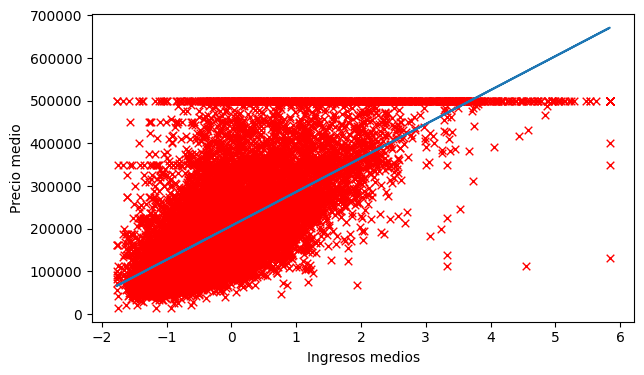

In [26]:
from sklearn.linear_model import LinearRegression
reg_univ = LinearRegression()

X = df_train_final["median_income"]
y = target_train

plt.figure(figsize=(7,4))
plt.scatter(X, y, s=30, c='r', marker='x', linewidths=1)
plt.xlabel('Ingresos medios')
plt.ylabel('Precio medio');

reg_univ.fit(X.to_numpy().reshape(-1, 1), y)

y_sk = reg_univ.intercept_ + reg_univ.coef_ * X

plt.plot(X, y_sk, label='Regresión Lineal (Scikit-learn)')

## Regresion Bivariada

In [27]:
reg_biv = LinearRegression()

X_biv = train_set[["median_income", "total_rooms"]].copy()
y_biv = target_train

reg_biv.fit(X_biv, y_biv)

y_sk_bi = reg_biv.predict(X_biv)

print(f"y_est = {reg_biv.intercept_} + {reg_biv.coef_[0]} * x1 + {reg_biv.coef_[1]} * x2" )

y_est = 45476.527342204616 + 41766.17714290227 * x1 + -0.1342493702428943 * x2


## Regresion Multivariada

In [28]:
reg_multiv = LinearRegression()
X_multiv = df_train_final.copy()
y_multiv = target_train

reg_multiv.fit(X_multiv, y_multiv)
y_sk_multiv = reg_multiv.predict(X_multiv)

print(f"Término independiente: {reg_multiv.intercept_}\nCoeficientes: {reg_multiv.coef_}")

Término independiente: 237792.18716701365
Coeficientes: [-53158.46752879 -54016.74420924  13723.55752923 -10022.16419715
  29937.91903315 -43815.82009104  28900.33562175  73737.44249419
 -18139.05294479 -57836.49981854 112925.81797133 -22517.51078879
 -14432.75441921]


In [29]:
print("Univariado: ", mean_squared_error(y, y_sk))
print("Bivariado: ", mean_squared_error(y_biv, y_sk_bi))
print("Bivariado: ", mean_squared_error(y_biv, y_sk_bi))


Univariado:  7065442679.440049
Bivariado:  7065363569.652264
Bivariado:  7065363569.652264
